<a href="https://colab.research.google.com/github/genarioazevedoufape/atividades_pet_data_science/blob/main/Sauter_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import datetime as dt

import statsmodels.api as sm
import statsmodels.tsa.api as smt
from statsmodels.tsa.seasonal import seasonal_decompose

import warnings
warnings.filterwarnings('ignore')

## Importação dos Dados

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
patch = '/content/drive/My Drive/PET DATA SCIENCE - 2024/M5_full.parquet'

In [ ]:
df = pd.read_parquet(patch)

In [ ]:
df

,id,item_id,dept_id,cat_id,store_id,state_id,value,date
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,2011-01-29
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,2011-01-29
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,2011-01-29
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,2011-01-29
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,2011-01-29
...,...,...,...,...,...,...,...,...
59181085,FOODS_3_823_WI_3_evaluation,FOODS_3_823,FOODS_3,FOODS,WI_3,WI,1,2016-05-22
59181086,FOODS_3_824_WI_3_evaluation,FOODS_3_824,FOODS_3,FOODS,WI_3,WI,0,2016-05-22
59181087,FOODS_3_825_WI_3_evaluation,FOODS_3_825,FOODS_3,FOODS,WI_3,WI,2,2016-05-22
59181088,FOODS_3_826_WI_3_evaluation,FOODS_3_826,FOODS_3,FOODS,WI_3,WI,0,2016-05-22


## Análise Descritiva dos Dados

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59181090 entries, 0 to 59181089
Data columns (total 8 columns):
 #   Column    Dtype   
---  ------    -----   
 0   id        category
 1   item_id   category
 2   dept_id   category
 3   cat_id    category
 4   store_id  category
 5   state_id  category
 6   value     int16   
 7   date      object  
dtypes: category(6), int16(1), object(1)
memory usage: 1017.2+ MB


In [ ]:
df.isna().sum()

id          0
item_id     0
dept_id     0
cat_id      0
store_id    0
state_id    0
value       0
date        0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.value.describe().round(2)

count    59181090.00
mean            1.13
std             3.87
min             0.00
25%             0.00
50%             0.00
75%             1.00
max           763.00
Name: value, dtype: float64

In [ ]:
print("\nValores únicos por coluna categórica:")
for column in df.select_dtypes(include=['category']).columns:
    print(f"{column}: {df[column].nunique()}")


Valores únicos por coluna categórica:
id: 30490
item_id: 3049
dept_id: 7
cat_id: 3
store_id: 10
state_id: 3


In [ ]:
df['date'] = pd.to_datetime(df['date'])

In [ ]:
df['dia'] = df['date'].dt.day
df['mes'] = df['date'].dt.month
df['ano'] = df['date'].dt.year

In [ ]:
df.set_index('date', inplace=True)

In [ ]:
df

,id,item_id,dept_id,cat_id,store_id,state_id,value,dia,mes,ano
date,,,,,,,,,,
2011-01-29,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,29,1,2011
2011-01-29,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,29,1,2011
2011-01-29,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,29,1,2011
2011-01-29,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,29,1,2011
2011-01-29,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,29,1,2011
...,...,...,...,...,...,...,...,...,...,...
2016-05-22,FOODS_3_823_WI_3_evaluation,FOODS_3_823,FOODS_3,FOODS,WI_3,WI,1,22,5,2016
2016-05-22,FOODS_3_824_WI_3_evaluation,FOODS_3_824,FOODS_3,FOODS,WI_3,WI,0,22,5,2016
2016-05-22,FOODS_3_825_WI_3_evaluation,FOODS_3_825,FOODS_3,FOODS,WI_3,WI,2,22,5,2016


## Análise Exploratória Visual

In [ ]:
# Agrupando e somando as vendas mensais
dados_mensais = df.groupby(['ano', 'mes'])['value'].sum().reset_index()

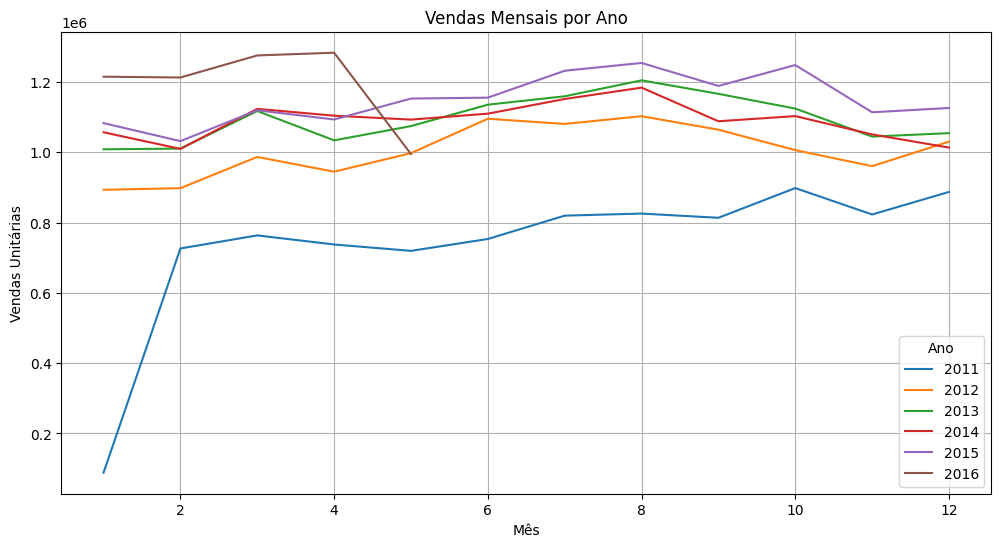

In [ ]:
plt.figure(figsize=(12, 6))
for ano in dados_mensais['ano'].unique():
    df_ano = dados_mensais[dados_mensais['ano'] == ano]
    plt.plot(df_ano['mes'], df_ano['value'], label=f'{ano}')

plt.title('Vendas Mensais por Ano')
plt.xlabel('Mês')
plt.ylabel('Vendas Unitárias')
plt.legend(title='Ano')
plt.grid(True)
plt.show()

Soma dos valores de vendas para cada combinação de ano e mês.

<Figure size 1600x600 with 0 Axes>

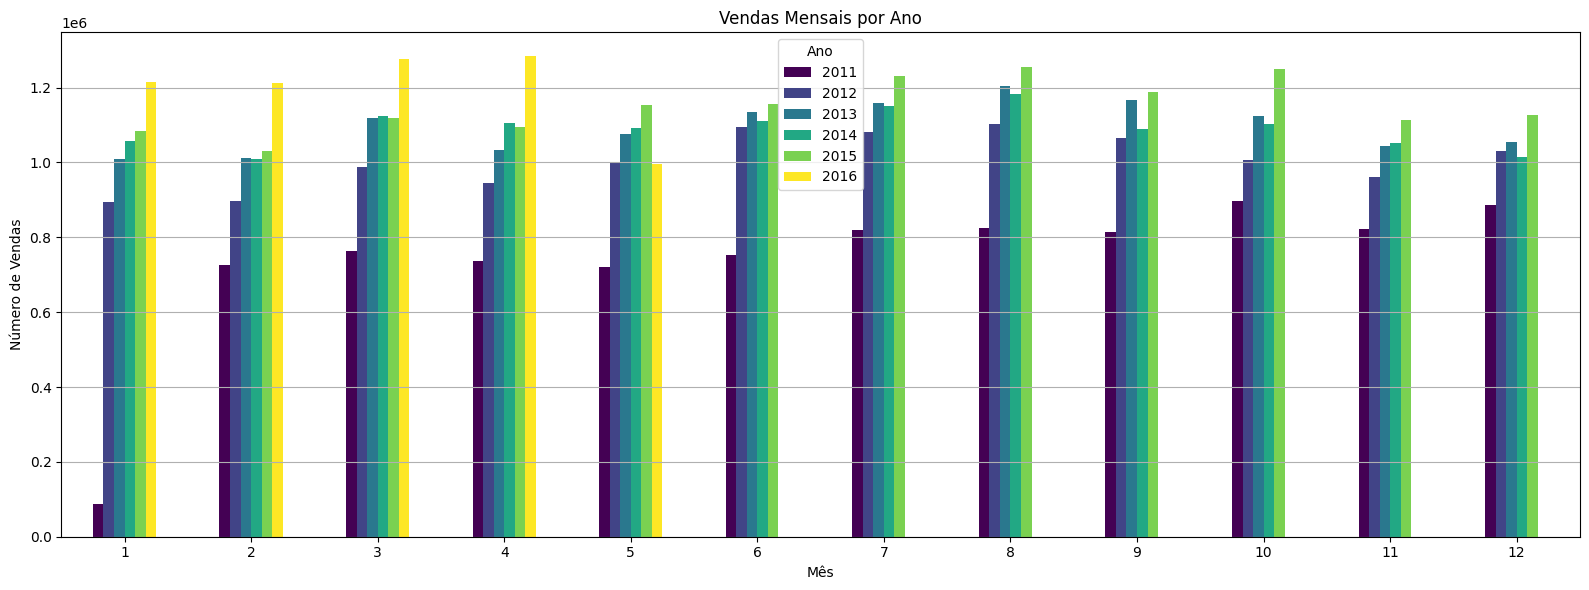

In [ ]:
pivot_table = dados_mensais.pivot(index='mes', columns='ano', values='value')

plt.figure(figsize=(16, 6))
pivot_table.plot(kind='bar', figsize=(16, 6), colormap='viridis')
plt.xlabel('Mês')
plt.ylabel('Número de Vendas')
plt.title('Vendas Mensais por Ano')
plt.xticks(rotation=0)
plt.legend(title='Ano')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

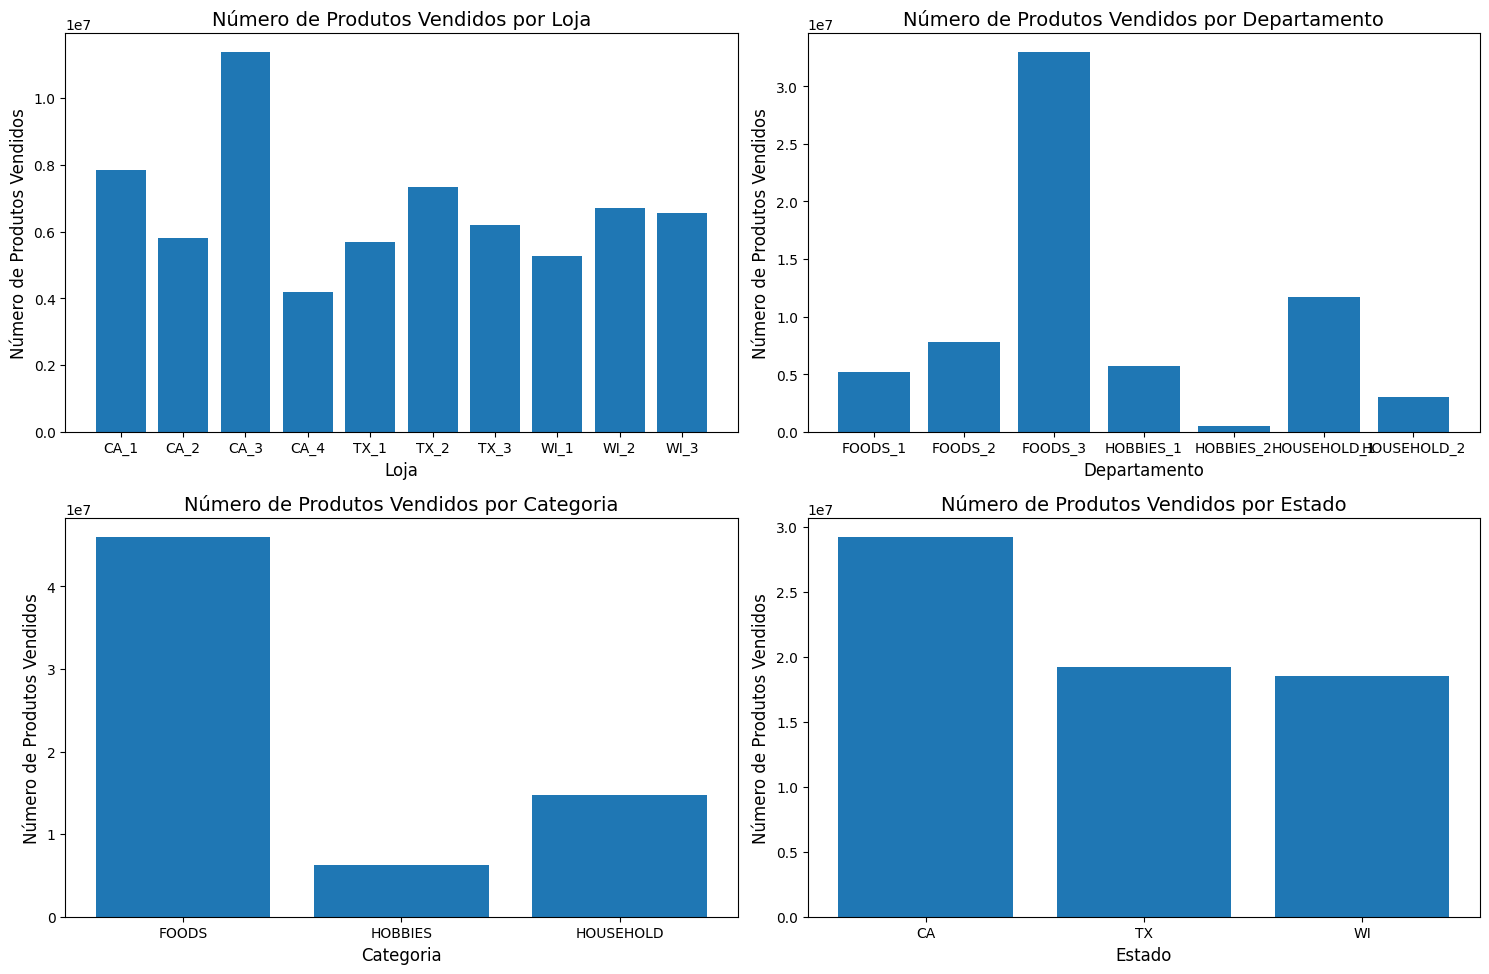

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

vendas_por_loja = df.groupby('store_id')['value'].sum()
axs[0, 0].bar(vendas_por_loja.index, vendas_por_loja.values)
axs[0, 0].set_xlabel('Loja', fontsize=12)
axs[0, 0].set_ylabel('Número de Produtos Vendidos', fontsize=12)
axs[0, 0].set_title('Número de Produtos Vendidos por Loja', fontsize=14)

vendas_por_departamento = df.groupby('dept_id')['value'].sum()
axs[0, 1].bar(vendas_por_departamento.index, vendas_por_departamento.values)
axs[0, 1].set_xlabel('Departamento', fontsize=12)
axs[0, 1].set_ylabel('Número de Produtos Vendidos', fontsize=12)
axs[0, 1].set_title('Número de Produtos Vendidos por Departamento', fontsize=14)

vendas_por_categoria = df.groupby('cat_id')['value'].sum()
axs[1, 0].bar(vendas_por_categoria.index, vendas_por_categoria.values)
axs[1, 0].set_xlabel('Categoria', fontsize=12)
axs[1, 0].set_ylabel('Número de Produtos Vendidos', fontsize=12)
axs[1, 0].set_title('Número de Produtos Vendidos por Categoria', fontsize=14)

vendas_por_estado = df.groupby('state_id')['value'].sum()
axs[1, 1].bar(vendas_por_estado.index, vendas_por_estado.values)
axs[1, 1].set_xlabel('Estado', fontsize=12)
axs[1, 1].set_ylabel('Número de Produtos Vendidos', fontsize=12)
axs[1, 1].set_title('Número de Produtos Vendidos por Estado', fontsize=14)

plt.tight_layout()
plt.show()

In [ ]:
dados_agrupados = df.groupby('item_id')['value'].sum().sort_values(ascending=False)
itens_mais_vendidos = dados_agrupados.head(30)

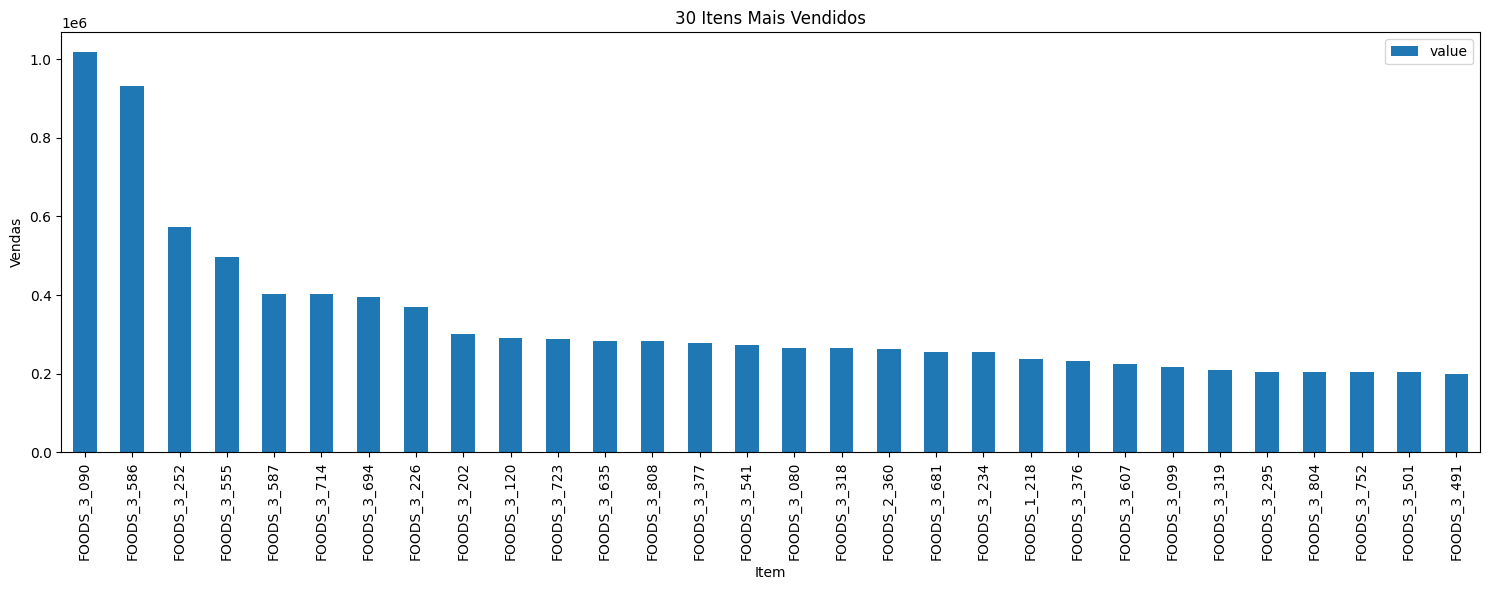

In [ ]:
plt.figure(figsize=(15, 6))
itens_mais_vendidos.plot(kind='bar')
plt.title('30 Itens Mais Vendidos')
plt.xlabel('Item')
plt.ylabel('Vendas')
plt.legend()
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

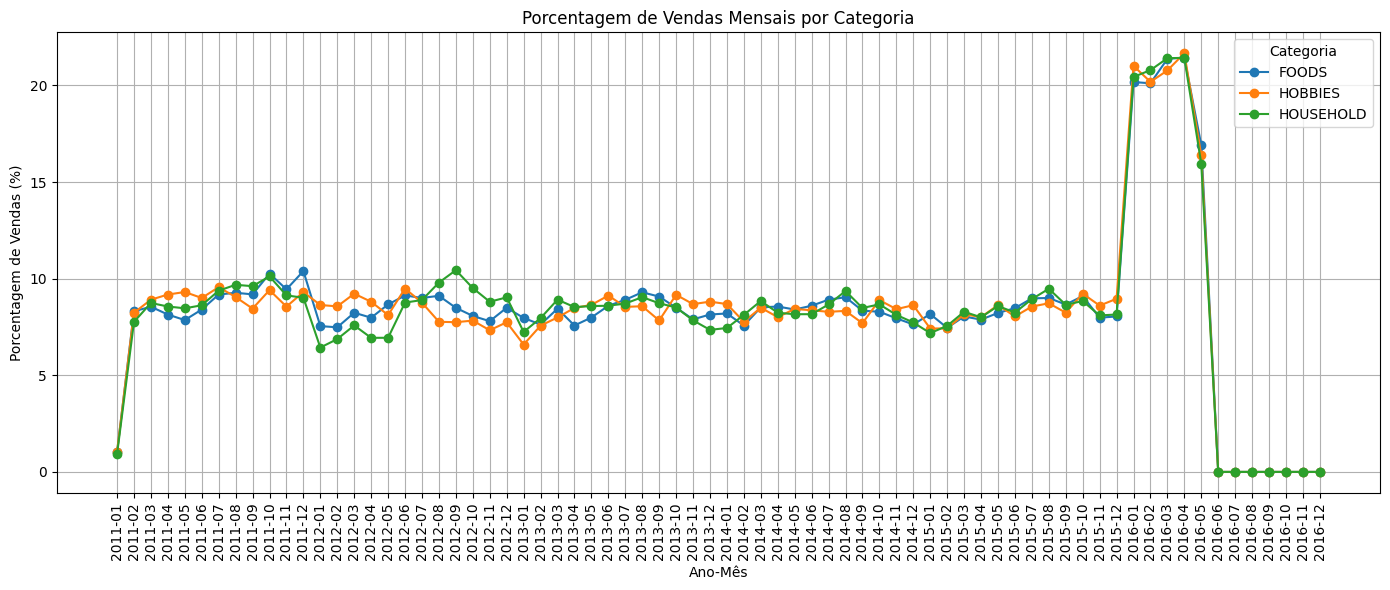

In [ ]:
df_mensal = df.groupby(['cat_id', 'ano', 'mes'])['value'].sum().reset_index()
df_mensal['ano_mes'] = df_mensal['ano'].astype(str) + '-' + df_mensal['mes'].astype(str).str.zfill(2)

# Calculando o total de vendas mensais por categoria
df_mensal['total_mes'] = df_mensal.groupby(['cat_id', 'ano'])['value'].transform('sum')

# Calculando a porcentagem de vendas mensais por categoria
df_mensal['percentagem'] = (df_mensal['value'] / df_mensal['total_mes']) * 100

# Plotando os dados
plt.figure(figsize=(14, 6))

categories = df_mensal['cat_id'].unique()
for category in categories:
    category_data = df_mensal[df_mensal['cat_id'] == category]
    plt.plot(category_data['ano_mes'], category_data['percentagem'], marker='o', label=category)

plt.xticks(rotation=90)
plt.xlabel('Ano-Mês')
plt.ylabel('Porcentagem de Vendas (%)')
plt.title('Porcentagem de Vendas Mensais por Categoria')
plt.legend(title='Categoria')
plt.grid(True)
plt.tight_layout()
plt.show()

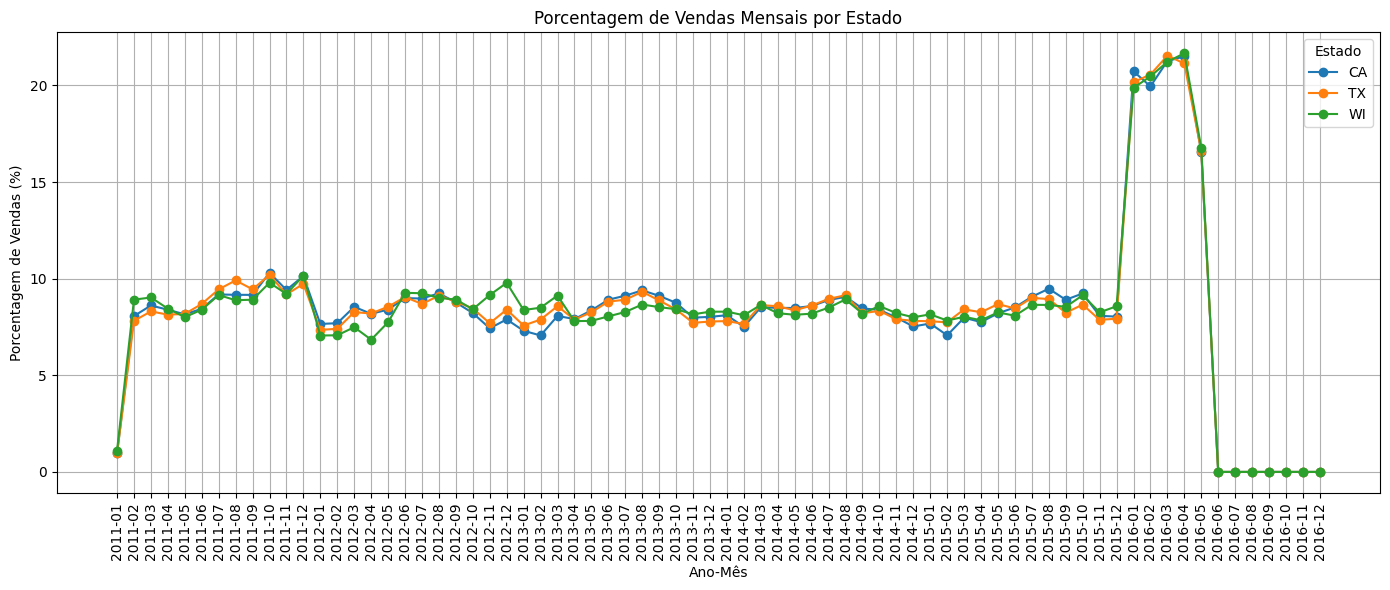

In [ ]:
df_mensal = df.groupby(['state_id', 'ano', 'mes'])['value'].sum().reset_index()
df_mensal['ano_mes'] = df_mensal['ano'].astype(str) + '-' + df_mensal['mes'].astype(str).str.zfill(2)

# Calculando o total de vendas mensais por Estado
df_mensal['total_mes'] = df_mensal.groupby(['state_id', 'ano'])['value'].transform('sum')

# Calculando a porcentagem de vendas mensais por Estado
df_mensal['percentagem'] = (df_mensal['value'] / df_mensal['total_mes']) * 100

# Plotando os dados
plt.figure(figsize=(14, 6))

states = df_mensal['state_id'].unique()
for state in states:
    state_data = df_mensal[df_mensal['state_id'] == state]
    plt.plot(state_data['ano_mes'], state_data['percentagem'], marker='o', label=state)

plt.xticks(rotation=90)
plt.xlabel('Ano-Mês')
plt.ylabel('Porcentagem de Vendas (%)')
plt.title('Porcentagem de Vendas Mensais por Estado')
plt.legend(title='Estado')
plt.grid(True)
plt.tight_layout()
plt.show()

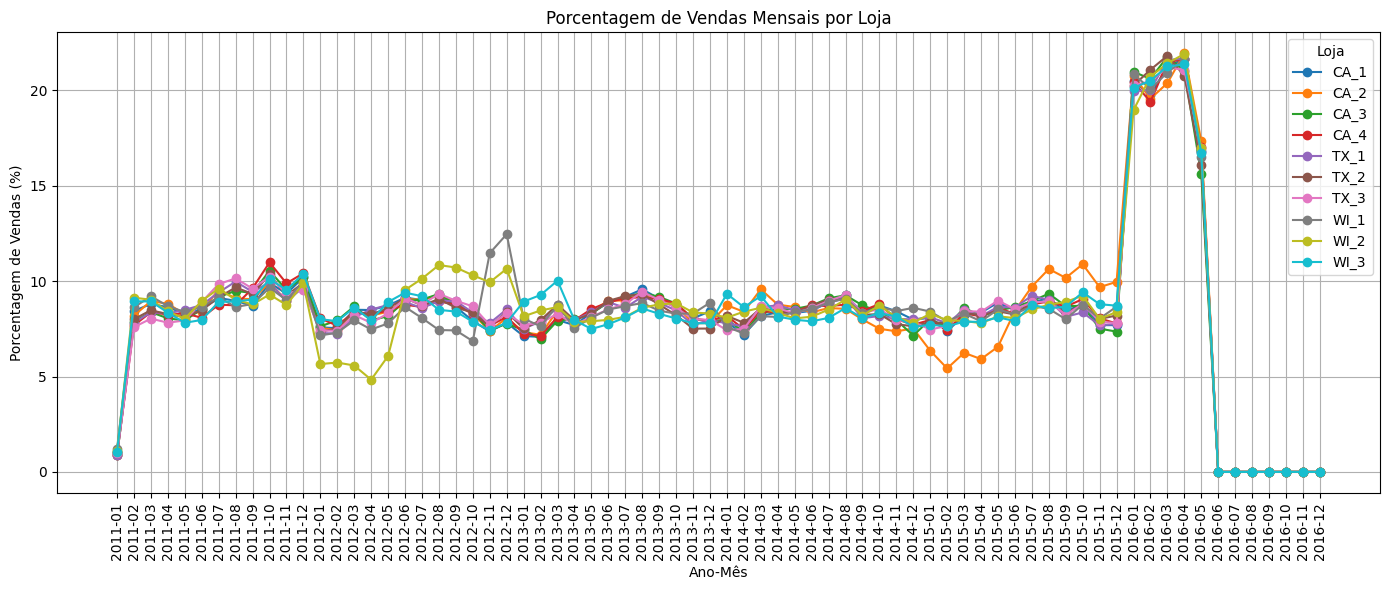

In [ ]:
df_mensal = df.groupby(['store_id', 'ano', 'mes'])['value'].sum().reset_index()
df_mensal['ano_mes'] = df_mensal['ano'].astype(str) + '-' + df_mensal['mes'].astype(str).str.zfill(2)

# Calculando o total de vendas mensais por Loja
df_mensal['total_mes'] = df_mensal.groupby(['store_id', 'ano'])['value'].transform('sum')

# Calculando a porcentagem de vendas mensais por Loja
df_mensal['percentagem'] = (df_mensal['value'] / df_mensal['total_mes']) * 100

# Plotando os dados
plt.figure(figsize=(14, 6))

stores = df_mensal['store_id'].unique()
for store in stores:
    store_data = df_mensal[df_mensal['store_id'] == store]
    plt.plot(store_data['ano_mes'], store_data['percentagem'], marker='o', label=store)

plt.xticks(rotation=90)
plt.xlabel('Ano-Mês')
plt.ylabel('Porcentagem de Vendas (%)')
plt.title('Porcentagem de Vendas Mensais por Loja')
plt.legend(title='Loja')
plt.grid(True)
plt.tight_layout()
plt.show()

##Média Movel

In [ ]:
media_mensal = df['value'].resample('M').mean()
media_movel_mensal = media_mensal.rolling(window=3).mean()

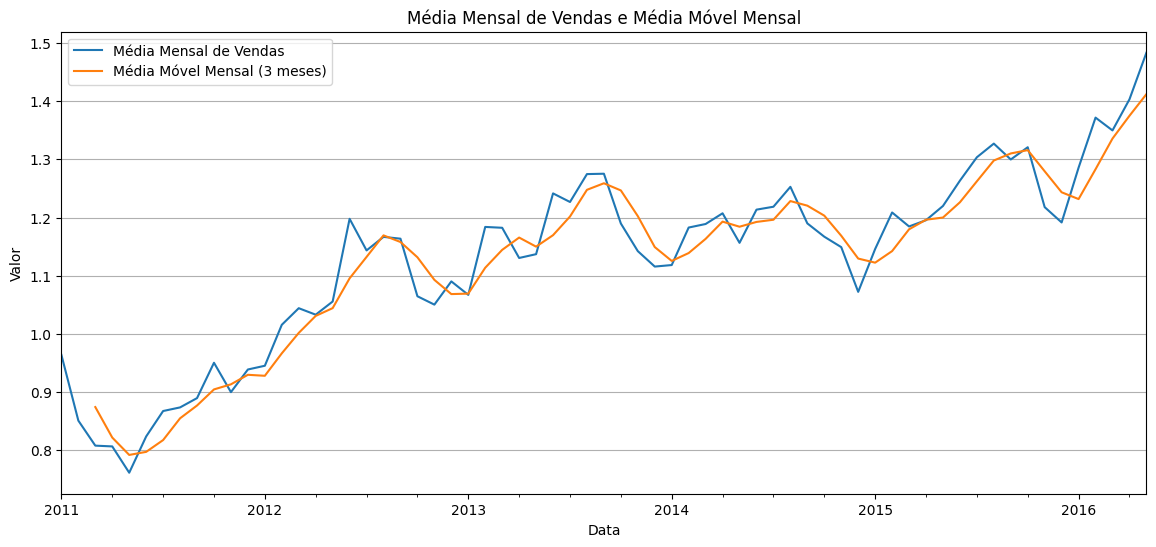

In [ ]:
plt.figure(figsize=(14, 6))
media_mensal.plot(label='Média Mensal de Vendas', )
media_movel_mensal.plot(label='Média Móvel Mensal (3 meses)', style='-')
plt.title('Média Mensal de Vendas e Média Móvel Mensal')
plt.xlabel('Data')
plt.ylabel('Valor')
plt.legend()
plt.grid(axis='y')
plt.show()

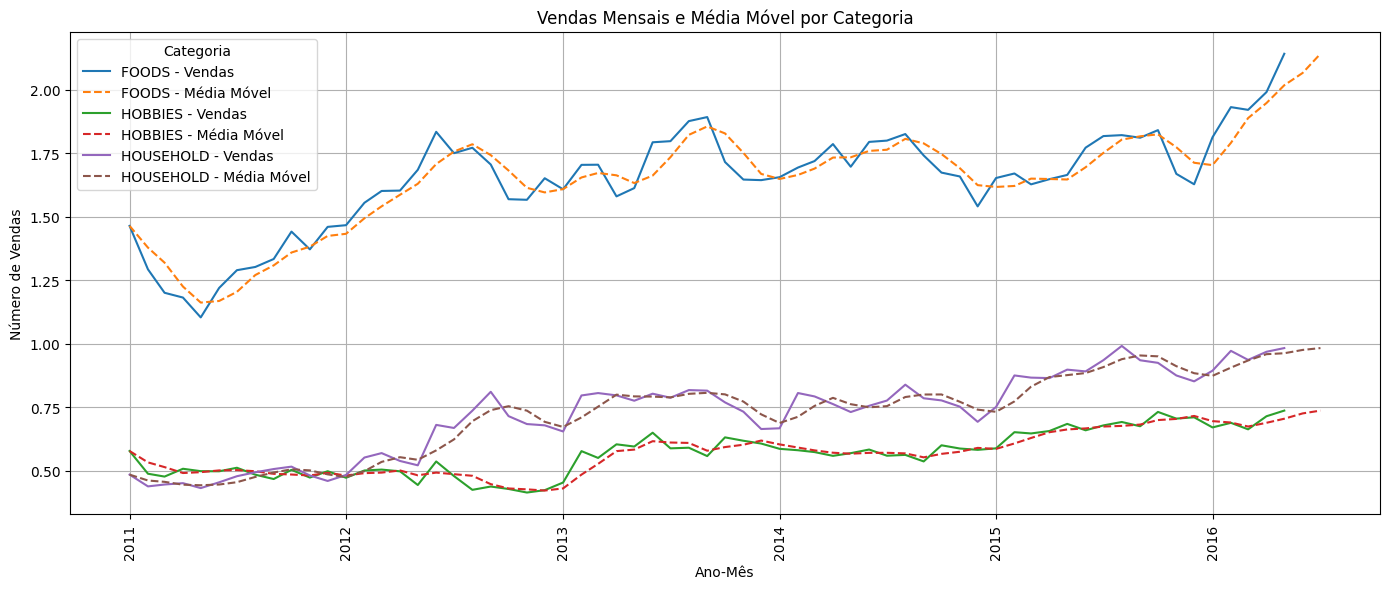

In [ ]:
# Agrupando e calculando a média das vendas mensais por categoria, ano e mês
df_mensal = df.groupby(['cat_id', 'ano', 'mes'])['value'].mean().reset_index()
df_mensal['ano_mes'] = pd.to_datetime(df_mensal['ano'].astype(str) + '-' + df_mensal['mes'].astype(str).str.zfill(2))
df_mensal = df_mensal.sort_values('ano_mes')

# Calculando a média móvel usando rolling window de 3 meses
df_mensal['media_movel'] = df_mensal.groupby('cat_id')['value'].transform(lambda x: x.rolling(window=3, min_periods=1).mean())

plt.figure(figsize=(14, 6))
categories = df_mensal['cat_id'].unique()
for category in categories:
    category_data = df_mensal[df_mensal['cat_id'] == category]
    plt.plot(category_data['ano_mes'], category_data['value'], label=f'{category} - Vendas')
    plt.plot(category_data['ano_mes'], category_data['media_movel'], linestyle='--', label=f'{category} - Média Móvel')

plt.xticks(rotation=90)
plt.xlabel('Ano-Mês')
plt.ylabel('Número de Vendas')
plt.title('Vendas Mensais e Média Móvel por Categoria')
plt.legend(title='Categoria')
plt.grid(True)
plt.tight_layout()
plt.show()

##Sazonalidade


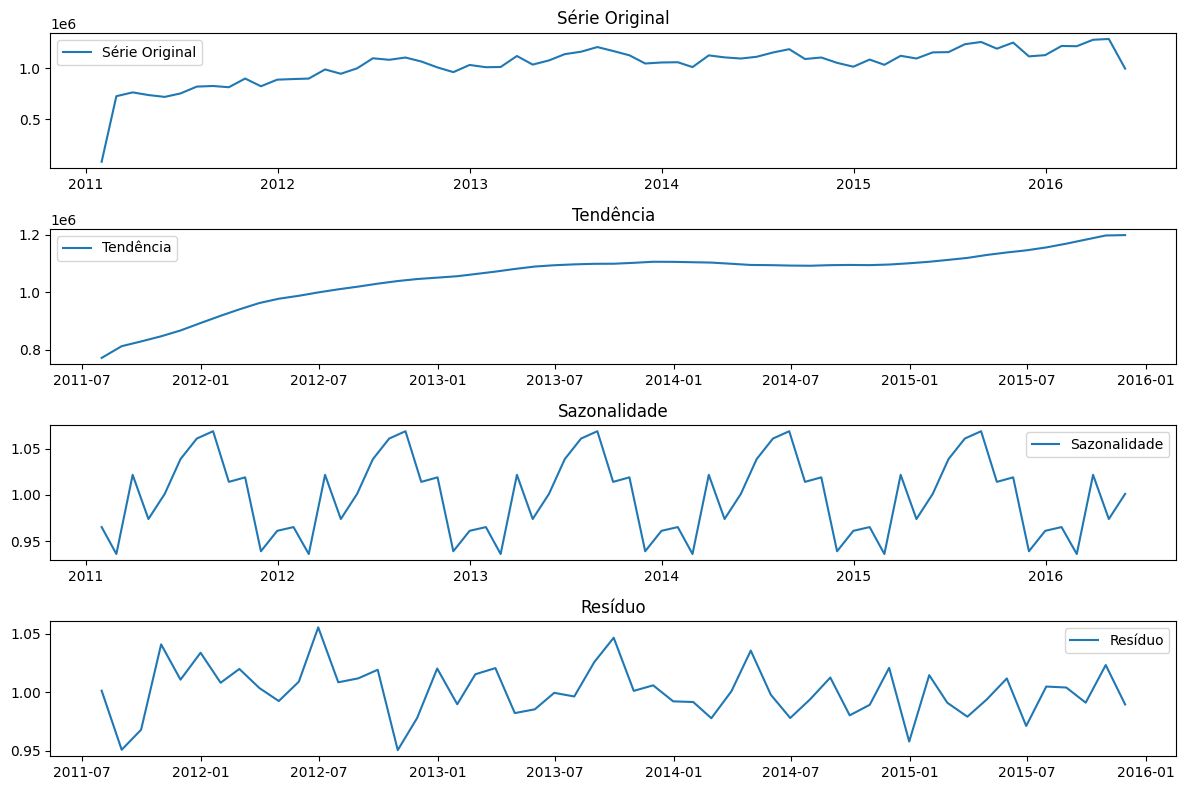

In [ ]:
df_mensal = df['value'].resample('M').sum()
result = seasonal_decompose(df_mensal, model='multiplicative')

plt.figure(figsize=(12, 8))

plt.subplot(411)
plt.plot(df_mensal, label='Série Original')
plt.title('Série Original')
plt.legend()

plt.subplot(412)
plt.plot(result.trend, label='Tendência')
plt.title('Tendência')
plt.legend()

plt.subplot(413)
plt.plot(result.seasonal, label='Sazonalidade')
plt.title('Sazonalidade')
plt.legend()

plt.subplot(414)
plt.plot(result.resid, label='Resíduo')
plt.title('Resíduo')
plt.legend()

plt.tight_layout()
plt.show()

 ## ACF